In [1]:
from intent_recognition import *

In [2]:
# EXERCICI 4 BÀSIC

hyperparams = {'vocab_size': 500, 'embedding_dim': 512, 'epochs': 10, 'batch_size': 32}

model = Sequential()
model.add(SimpleRNN(128, return_sequences=False))
basic = IntentRecognition(model, hyperparams, training_times=1, verbosing=1, name="BidirectionalGRU")
basic.train_model()
basic.print_training_information()
basic.evaluate_model()
basic.view_wrong_predictions()

Number of classes in training data: 22
Training model 1/1Epoch 1/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - accuracy: 0.1679 - f1_score: 0.0537 - loss: 2.8873 - val_accuracy: 0.0289 - val_f1_score: 0.0482 - val_loss: 3.4111
Epoch 2/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.3485 - f1_score: 0.1920 - loss: 1.8419 - val_accuracy: 0.3211 - val_f1_score: 0.1721 - val_loss: 2.2735
Epoch 3/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.4389 - f1_score: 0.2969 - loss: 0.8375 - val_accuracy: 0.5056 - val_f1_score: 0.2478 - val_loss: 1.6658
Epoch 4/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.6025 - f1_score: 0.4060 - loss: 0.4002 - val_accuracy: 0.5311 - val_f1_score: 0.2617 - val_loss: 1.4846
Epoch 5/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.6708 - f1_score: 0.4936 - loss: 0.2569 - val_accuracy: 0.6844 - val_f1_score: 0.3187 - val_loss: 1.0264
Epoch 6/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.8159 - f1_score: 0.58

In [1]:
model = Sequential()
model.add(Embedding(500, 256))  # Embedding layer
model.add(Bidirectional(LSTM(16, return_sequences=True)))
model.add(GlobalMaxPooling1D())
model.add(Dense(22, activation="softmax"))  # Output layer

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model and capture the training history
history = model.fit(
    basic.train_pad_sequences, 
    basic.train_encoded_labels, 
    batch_size=basic.hyperparams['batch_size'], 
    epochs=basic.hyperparams['epochs'], 
    validation_data=(basic.val_pad_sequences, basic.val_encoded_labels),
    verbose=basic.verbosing
)

NameError: name 'Sequential' is not defined

In [6]:
best_model = tf.keras.models.clone_model(model)
best_model.set_weights(model.get_weights())

ValueError: You called `set_weights(weights)` on layer 'sequential_3' with a weight list of length 15, but the layer was expecting 21 weights.

In [58]:
from plot_functions import *
df = pd.read_csv('./results/complete_results_rec2.csv')

plot_name_metrics(df, "k", metric="val_f1")

No data found for architecture: k


c:\Users\Usuario\Documents\Universitat\5_Quatri\TVD\frame-based\frame-based-system\plot_functions.py:85: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout() # Es veu millor


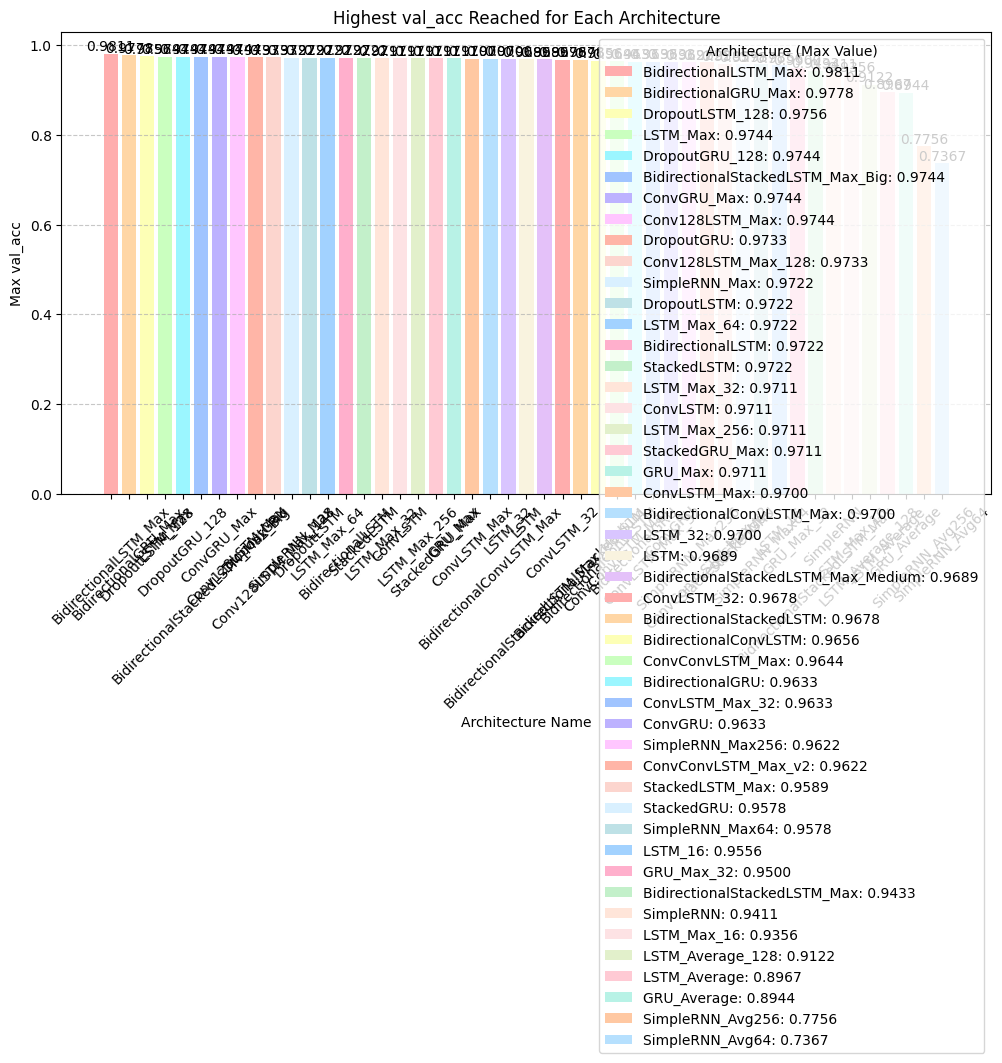

In [59]:
plot_highest_bar(df, metric="val_acc")

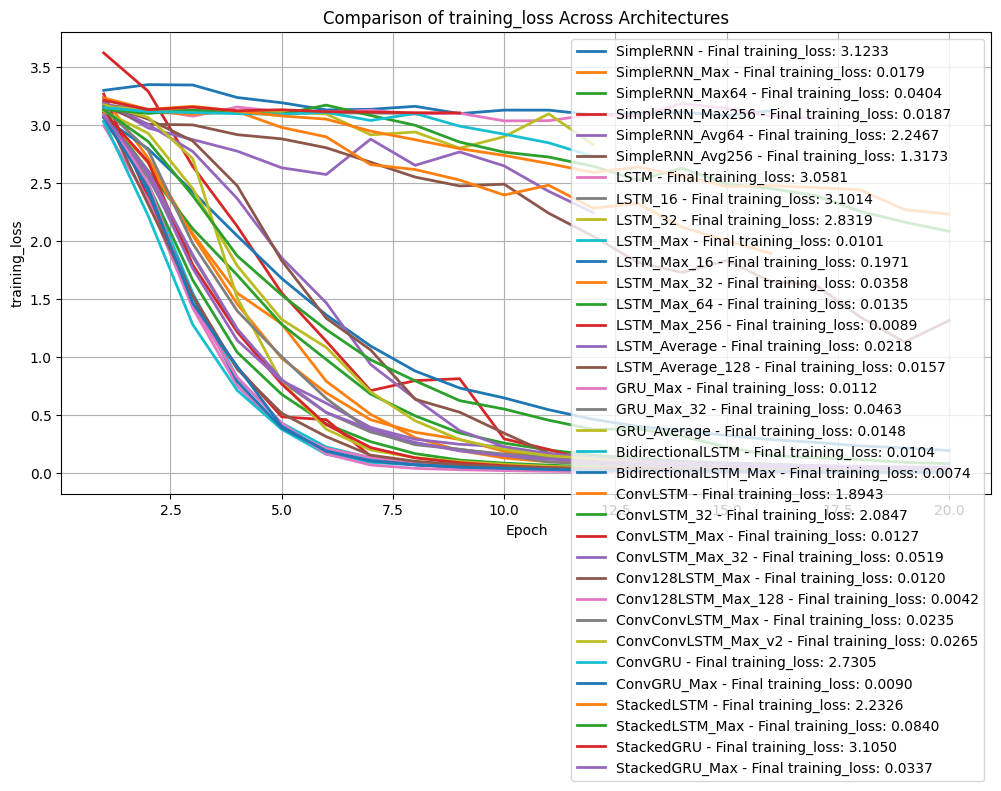

In [50]:
plot_compare_architectures(df, metric="training_loss")

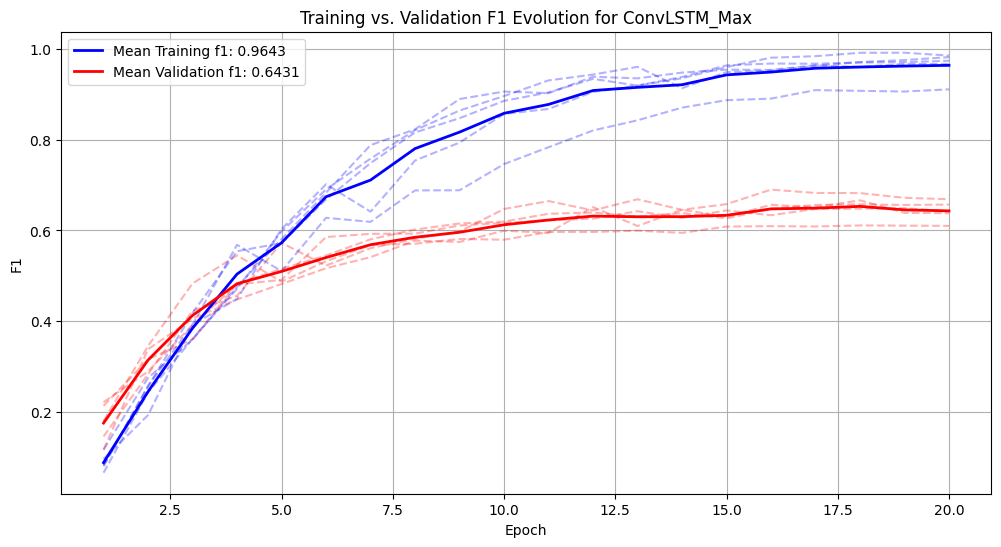

In [46]:
plot_train_val_comparison(df, 'ConvLSTM_Max', metric='f1', comparison_type='all')